# CE-40959: Deep Learning

# HW3. Part 3. CNN on CIFAR (20 + 10 points)

### Deadline:   16 Farvardin

In this problem, we will train a CNN on CIFAR-10 database. Next, we will go through the network and visualize its layers to see what is happening there. Then, we use the trained model in a Transfer Learning approach to classifying the CIFAR-100 database.

Let's start with loading data. First load the data by runing the code below:

In [2]:
from load_data import load_cifar10 #this function provided in the attached file loads the data of CIFAR10 database

def load_cifar10_data():
    dataset_dir = 'data/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_cifar10(dataset_dir)
    X_train, X_val = X_train[:45000], X_train[45000:]
    y_train, y_val = y_train[:45000], y_train[45000:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train shape: (45000, 32, 32, 3)
y_train shape: (45000, 1)
X_val shape: (5000, 32, 32, 3)
y_val shape: (5000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


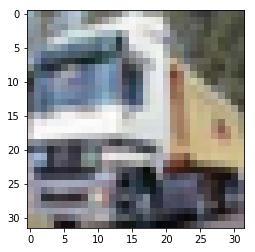

In [6]:
X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10_data()

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

import numpy as np
import matplotlib.pyplot as plt
plt.imshow(X_train[1].astype(np.uint8))#represnting a sample data from CIFAR-10
plt.show()

By successfully runing the above code, you have loaded the data and also you can see a sample data from CIFAR-10.

The below code will convert the labels to one-hot codes which will be later used for the classification.

In [7]:
from sklearn.preprocessing import OneHotEncoder # this function is used to prepare one-hot encoded labels
encoder = OneHotEncoder(sparse=False)

encoder.fit(y_train)#this line will fit 'encoder' to encode the labels

y_train_onehot = encoder.transform(y_train)# encoding train labels (one-hot coding)
y_test_onehot  = encoder.transform(y_test) # encoding test  labels (one-hot coding)
y_val_onehot = encoder.transform(y_val)

The function below is for converting data to several batches which we will use in training.

In [6]:
def make_batches(x, y, batch_size):
    n = len(y)
    steps = n // batch_size
    if n % batch_size != 0:
        steps += 1
    x_batches = np.array_split(x, steps)
    y_batches = np.array_split(y, steps)
    return x_batches, y_batches

## Part1: Trainig a CNN (15 pts.)

In this part, we are going to train a Convolutional Neural Network (CNN) with the below structure:

1. 16 * conv(5,5), activation function =ReLU
2. 16 * conv(5,5), activation function =ReLU
3. Max-pooling(3,3), stride=(2,2)
4. 32 * conv(5,5), activation function =ReLU
5. 32 * conv(5,5), activation function =ReLU
6. Max-pooling(3,3), stride=(2,2)
7. 64 * conv(5,5), activation function =ReLU
8. FC(128), activation function =ReLU
9. FC(128), activation function =ReLU
10. FC(10), activation function =softmax

Let's go to implement the model in the below box. Note that using **tf.layers** is **NOT ALLOWED** in this homework.

In [7]:
import tensorflow as tf

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 32, 32, 3]) # placeholder for input data
y = tf.placeholder(tf.float32, [None, 10])# placeholder for labels (one-hot encoded)

###################################################################
#########  TODO: Your code for implementing the network ###########
###################################################################

# Define the needed Variables here:
# e.g., W_conv1 has the shape of shape=[5, 5, 3, 64] and B_conv1 has the shape of shape=[64]

stddev = 0.05



W_conv1 = tf.Variable(tf.random_normal([5, 5, 3, 16], stddev= stddev), name= 'W_conv1')

W_conv2 = tf.Variable(tf.random_normal([5, 5, 16, 16], stddev= stddev), name= 'W_conv2')

W_conv3 = tf.Variable(tf.random_normal([5, 5, 16, 32], stddev= stddev), name= 'W_conv3')

W_conv4 = tf.Variable(tf.random_normal([5, 5, 32, 32], stddev= stddev), name= 'W_conv4')

W_conv5 = tf.Variable(tf.random_normal([5, 5, 32, 64], stddev= stddev), name= 'W_conv5')

B_conv1 = tf.Variable(tf.zeros(16), name= 'B_conv1')

B_conv2 = tf.Variable(tf.zeros(16), name= 'B_conv2')

B_conv3 = tf.Variable(tf.zeros(32), name= 'B_conv3')

B_conv4 = tf.Variable(tf.zeros(32), name= 'B_conv4')

B_conv5 = tf.Variable(tf.zeros(64), name= 'B_conv5')

W_FC1 = tf.Variable(tf.random_normal([8 * 8 * 64, 128], stddev= stddev), name= 'W_FC1')

W_FC2 = tf.Variable(tf.random_normal([128, 128], stddev= stddev), name= 'W_FC2')

W_out = tf.Variable(tf.random_normal([128, 10], stddev= stddev), name= 'W_out')

B_FC1 = tf.Variable(tf.zeros(128))

B_FC2 = tf.Variable(tf.zeros(128))

B_out = tf.Variable(tf.zeros(10))

# Define the layers here:

# Convolutional Layer 1  # without Pooling # 
conv1 = tf.nn.conv2d(x, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + B_conv1
conv1_relu = tf.nn.relu(conv1)
#pooling1 = tf.nn.max_pool(conv1_relu, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')

# Convolutional Layer 2  # with Pooling # 
conv2 = tf.nn.conv2d(conv1_relu, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + B_conv2
conv2_relu = tf.nn.relu(conv2)
pooling2 = tf.nn.max_pool(conv2_relu, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')

# Convolutional Layer 3  # without Pooling # 
conv3 = tf.nn.conv2d(pooling2, W_conv3, strides=[1, 1, 1, 1], padding='SAME') + B_conv3
conv3_relu = tf.nn.relu(conv3)

# Convolutional Layer 4  # with Pooling # 
conv4 = tf.nn.conv2d(conv3_relu, W_conv4, strides=[1, 1, 1, 1], padding='SAME') + B_conv4
conv4_relu = tf.nn.relu(conv4)
pooling4 = tf.nn.max_pool(conv4_relu, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')

# Convolutional Layer 5  # without Pooling # 
conv5 = tf.nn.conv2d(pooling4, W_conv5, strides=[1, 1, 1, 1], padding='SAME') + B_conv5
conv5_relu = tf.nn.relu(conv5)

# Fully Connected Layer 1
fc = tf.reshape(conv5_relu, [-1, 8 * 8 * 64], name= 'fc')
FC1 = tf.nn.relu(tf.add(tf.matmul(fc, W_FC1), B_FC1))

# Fully Connected Layer 2
FC2 = tf.nn.relu(tf.add(tf.matmul(FC1, W_FC2), B_FC2))

logits = tf.add(tf.matmul(FC2, W_out), B_out)

y_hat = tf.nn.softmax(logits)


Now you need to define an optimizer. You are free to use any optimizer. You can change optimizer or learning rate if you want :)

In [8]:
############ Cross entropy loss ############################
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y))
# Note: logits in the above line is the last layer values (a 10-neuron layer) before the softmax activation function. 
#       In other words, you may have written y_hat = tf.nn.softmax(logits) in the above box in which y_hat is the output
#       of the network.

############ Adam optimizer ################################
lr = 1e-4 # learning rate
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
trainer = optimizer.minimize(cross_entropy)

############################################################
#            TODO: Implement Accuracy                      #
############################################################
y_pred_cls = tf.argmax(y_hat, axis=1)
y_true_cls = tf.argmax(y, axis=1)
correct_preds = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))
# Note: The defined accuray does not play any role in the optimization process. However, it is a mtric which we can 
#       use as a log for mintoring training process with more metrics rather than a single loss function.
############################################################

You can go for the rest of the job, handle the Session and go for training. 
You can use tensorboard or the code provided in the next box to plot for loss and accuracy of training and validation data.
You are expected to achieve at least 60% accuracy on the test data after the training process. Good Luck! ;)

In [9]:
########## Training ##########
batch_size = 256 # You are free to change it
x_train_batches, y_train_batches = make_batches(X_train, y_train_onehot, batch_size)
epochs = 100  # You are free to change it
N_Batches = len(x_train_batches)

train_acc = np.zeros(epochs)
train_loss = np.zeros(epochs)
val_acc = np.zeros(epochs)
val_loss = np.zeros(epochs)

saver = tf.train.Saver()
MM = 1
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        if epoch % MM == 0 : 
            print()
            print("*" * 10, "Epoch %3i"%epoch, "*" * 10)
        
        batch_acc = np.zeros(N_Batches)
        batch_loss = np.zeros(N_Batches)
        for n in range(N_Batches):
            _, batch_acc[n], batch_loss[n] = sess.run([trainer, accuracy, cross_entropy],
                        {x: x_train_batches[n],
                         y: y_train_batches[n]})

        train_acc[epoch] = np.mean(batch_acc)
        train_loss[epoch] = np.mean(batch_loss)
        if epoch % MM == 0 : 
            print("Train:\t\tAccuracy= %0.4f \tLoss= %0.4f"%(train_acc[epoch], train_loss[epoch]))

        ########## Validation ##########
        val_acc[epoch], val_loss[epoch] = sess.run([accuracy, cross_entropy],
               {x: X_val, y: y_val_onehot})
        if epoch % MM == 0 : 
            print("Validation:\tAccuracy= %0.4f \tLoss= %0.4f"%(val_acc[epoch], val_loss[epoch]))
        
    ############################################################
    #            TODO: Implement Test Phase                    #
    ############################################################
    test_acc, test_loss = sess.run([accuracy, cross_entropy],
                                  {x: X_test, y: y_test_onehot})
    print("Test:\tAccuracy= %0.4f \tLoss= %0.4f"%(test_acc, test_loss))
    ############################################################
    saved_path = saver.save(sess, './my-model')


********** Epoch   0 **********
Train:		Accuracy= 0.2585 	Loss= 2.0233
Validation:	Accuracy= 0.3268 	Loss= 1.8296

********** Epoch   1 **********
Train:		Accuracy= 0.3951 	Loss= 1.6895
Validation:	Accuracy= 0.4204 	Loss= 1.5948

********** Epoch   2 **********
Train:		Accuracy= 0.4436 	Loss= 1.5439
Validation:	Accuracy= 0.4598 	Loss= 1.4910

********** Epoch   3 **********
Train:		Accuracy= 0.4697 	Loss= 1.4693
Validation:	Accuracy= 0.4834 	Loss= 1.4290

********** Epoch   4 **********
Train:		Accuracy= 0.4904 	Loss= 1.4195
Validation:	Accuracy= 0.4936 	Loss= 1.3920

********** Epoch   5 **********
Train:		Accuracy= 0.5045 	Loss= 1.3811
Validation:	Accuracy= 0.5072 	Loss= 1.3766

********** Epoch   6 **********
Train:		Accuracy= 0.5196 	Loss= 1.3474
Validation:	Accuracy= 0.5220 	Loss= 1.3564

********** Epoch   7 **********
Train:		Accuracy= 0.5338 	Loss= 1.3128
Validation:	Accuracy= 0.5362 	Loss= 1.3200

********** Epoch   8 **********
Train:		Accuracy= 0.5454 	Loss= 1.2825
Validati

### Training Diagram

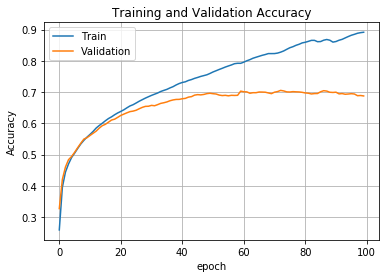

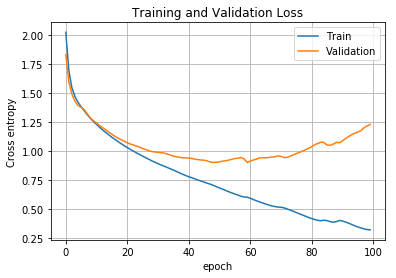

In [10]:
########## Plot metrics #########################
fig = plt.figure()
plt.plot(range(epochs), train_acc, label='Train')
plt.plot(range(epochs), val_acc, label='Validation')
plt.title("Training and Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc=0)
plt.show()

fig = plt.figure()
plt.plot(range(epochs), train_loss, label='Train')
plt.plot(range(epochs), val_loss, label='Validation')
plt.title("Training and Validation Loss")
plt.xlabel("epoch")
plt.ylabel("Cross entropy")
plt.grid(True)
plt.legend(loc=0)
plt.show()

## Part2: Visualizing the Network (5 pts.)

Now, we want to check the weights to see how the network realy works and what it does. Consider the wieghts of the first convolutional layer, find its weights values and print the values of 2 arbitrary filters:

INFO:tensorflow:Restoring parameters from ./my-model


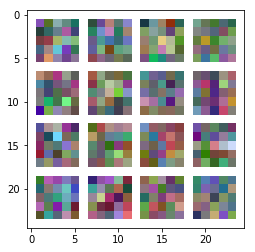

In [13]:
##########################################################################
# TODO                                                                   #
# Note: To retrieve the values of the weight-variables from TensorFlow,  #
#       feed-dict is not necessary because                               #
#       nothing is calculated.                                           #
#       e.g., w = sess.run(weights)                                      #
##########################################################################
import matplotlib.pyplot as plt

with tf.Session() as sess:
    saver.restore(sess, './my-model')
    w = sess.run(W_conv1)
    w = (w - w.min())/(w.max() - w.min()) # normalaize data
    f = 4

    pic = np.ones((w.shape[0]*f + f+1, w.shape[1]*f + f+1, w.shape[2]))

    for i in range(f):
        for j in range(f):
            pic[w.shape[0]*i+i+1: w.shape[0]*(i+1)+i+1, 
                 w.shape[1]*j+j+1: w.shape[1]*(j+1)+j+1, :] = w[:,:,:,f*i+j]


    plt.imshow(pic)
    plt.show()
    plt.close()
    
#     print (np.round(layer_one_weights[:2],2))
##########################################################################

### Question: Try to interpret what they are doing?

### Answer: 

As you can observe, these filters can detect low level features like Diagonal lines, bubbles, etc.
these low level features will combine together and make more complex features in next layers.

Now let's visualize the filters of the first conv layer. There are lots of ways to code for visualization. You are free to choose any way you want. However below is function which is provided for you to plot the weights.

INFO:tensorflow:Restoring parameters from ./my-model


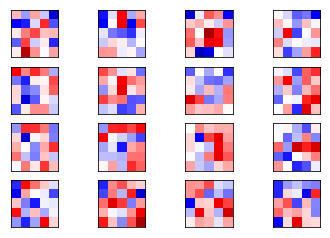

In [15]:
import math
def plot_conv_weights(w, input_channel=0):
    # The argument w is a 4-dim array.(e.g. weights_conv1 with the shape of [5,5,3,64])
    # The argument input_channel shows the specified channel of all filters.
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)
    abs_max = max(abs(w_min), abs(w_max))

    # Number of filters used in the conv. layer.
    num_filters = w.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # The format of this 4-dim tensor is determined by the
            # TensorFlow API. See Tutorial #02 for more details.
            img = w[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=-abs_max, vmax=abs_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

    
##########################################################################
# TODO: call the function above or use your own way here                 #
##########################################################################
with tf.Session() as sess:
    saver.restore(sess, './my-model')
    plot_conv_weights(sess.run(W_conv1), input_channel=0)


##########################################################################


### Question: Try to interpret what they are doing?

### Answer: 

exactly like previous part.